In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/sample_data/california_housing_test.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [7]:
x = df.median_income
y = df.median_house_value

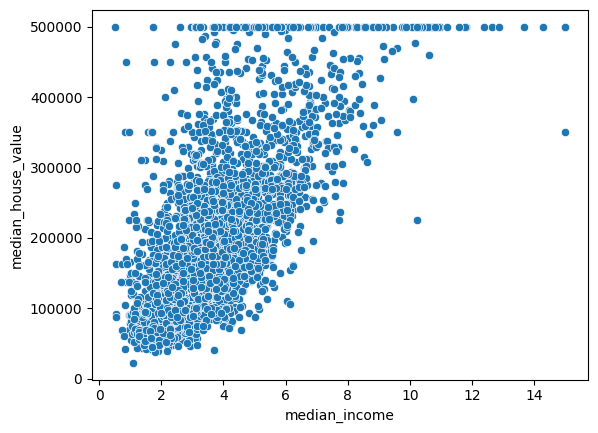

In [9]:
sns.scatterplot(data=df, x='median_income' , y='median_house_value')
plt.show()

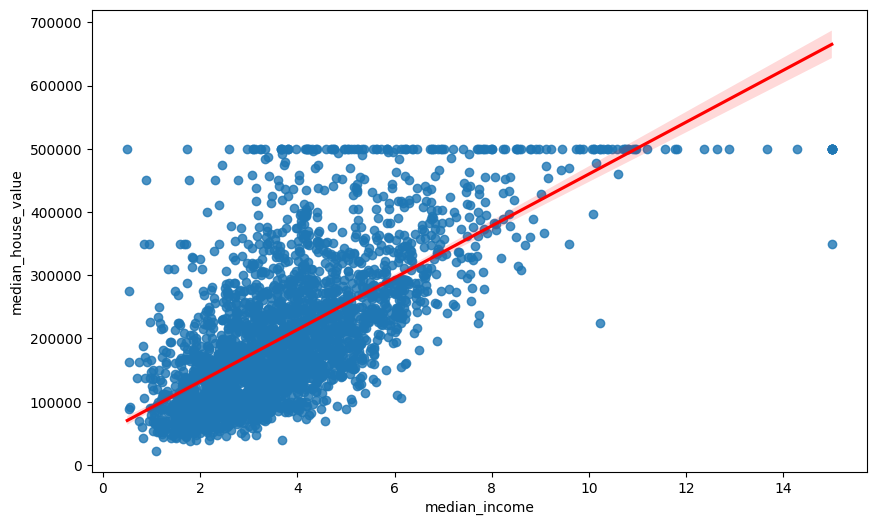

In [10]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='median_income', y='median_house_value', line_kws={"color": "red"})
plt.show()

# Regression formula

In [32]:
# y = mx + b
# calculate m
def calculate_mb(x,y):
  for i in range(len(x)):
    x_i = x[i] - x.mean()
    y_i = y[i] - x.mean()
    x_sq = (x[i] - x.mean()) ** 2
    m = (x_i * y_i) / x_sq
    b = y.mean() - (m*x.mean())
    return m,b
m,b = calculate_mb(x,y)

def linear_reg(x,m,b):
  y = []
  for i in range(len(x)):
    y.append((m*x[i]) + b)
  return np.array(y)


array([550542.4677282 , 180218.05359603, 450242.93958096, 492388.18358835,
        98819.28305327, -57948.71947352, -57874.88838913, 134196.67765802,
       188905.51119288,  24471.38107   ,   8733.05491366,  34733.90180056,
       314467.5753831 , 298778.46994969, 440238.82764577])

In [52]:
test_set = x[:15]
prediction = np.abs(linear_reg(test_set,m,b))
prediction
y_test = y[:15]

numpy.ndarray

In [44]:
pd.DataFrame({'Prediction': np.abs(prediction), 'Real Value': y[:15]})

,Prediction,Real Value
0,550542.467728,344700.0
1,180218.053596,176500.0
2,450242.939581,270500.0
3,492388.183588,330000.0
4,98819.283053,81700.0
5,57948.719474,67000.0
6,57874.888389,67000.0
7,134196.677658,166900.0
8,188905.511193,194400.0
9,24471.381070,164200.0


In [66]:
# Calculate RMSE
def calculate_rmse(y_predicted, y_observed):
  n = y_predicted.shape[0]
  summa = 0
  for i in range(n):
    summa = summa + (((y_predicted[i] - y_observed[i]) ** 2) / n)
  return summa ** 0.5


In [67]:
calculate_rmse(prediction, y_test)

113143.69796423176